# Machine Vision 2022/23 - Assignment 1: Basic Python and Application of Filters

This assignment will introduce you to python and the most important features you will need throughout the machine vision course.
&nbsp;


#### Part 1: Basic Python Functions

In python packages are imported using the `import x` keyword. Additionally, if only a specific function is imported the `from` keyword is used.
This course heavily relies on the [NumPY](https://numpy.org/) library, which is the de-facto standard library for array computation in python.
&nbsp;



In [1]:
# @student import the numpy library
import numpy as np


Numpy offers implementations of common math functions like sin, cos, log, exp, sqrt, and so on.

In [2]:
# @student calculate the sine of 0.5
np.sin(0.5)

0.47942553860420295

The array class `np.array` stores multidimensional values.

In [3]:
# The np.array([...]) constructor takes a list of elements as argument.
# @student: create an array containing the values from 0 to 10
zero_to_ten = np.array([0,1,2,3,4,5,6,7,8,9,10])

# Numpy also offers the numpy.arange() and numpy.linspace() functions which both offer the functionality
# to create arrays containing a range of values.
# @student: create an array containing the values from 0 to 10 using numpy.arange() and numpy.linspace()
zero_to_ten_linspace = np.linspace(0, 10, 11)
zero_to_ten_arange = np.arange(0, 11, 1)

If an array is passed to a common math function like sine(x), the function is applied to each element individually.

In [4]:
# @students calculate the sine of the interval from 0 to 2*pi.
x_sin_0_2pi_005 = np.linspace(0, 2*np.pi, 50)
sin_0_2pi_005 = np.sin(x_sin_0_2pi_005)

The next package we will use is matplotlib. This package provides different visualization methods for data.

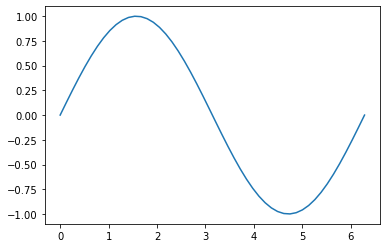

In [5]:
import matplotlib.pyplot as plt

# @student: plot the calculated sine wave
# the plt.plot(x, y) function takes x values as first argument and y values as second argument
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(x_sin_0_2pi_005, sin_0_2pi_005)

#### Part 2: Linear Algebra

In computer vision, linear algebra is frequently used. NumPy offers different algorithms on vectors/matrices.

$$\begin{bmatrix} 30 \\ 8 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 & 5 & 1 \\ 2 & 0 & 1 \\ -1 & 1 & 0 \end{bmatrix} * \begin{bmatrix} 2 \\ 4 \\ 4 \end{bmatrix} $$

In [6]:
# @student calculate the equation above using numpys arrays

# it is important not to use the * operator for matrix multiplication.
# For matrix multiplication the function numpy.matmul(m1, m2) exists. Please use
# this function as it performs the intended calculation.

A = np.ndarray(shape=[3,3]) # creates a 3x3 matrix
A[0,0] = 3
A[0,1] = 5
A[0,2] = 1
A[1,0] = 2
A[1,1] = 0
A[1,2] = 1
A[2,0] = -1
A[2,1] = 1
A[2,2] = 0

x = np.ndarray(shape=[3,1])
x[0,0] = 2
x[1,0] = 4
x[2,0] = 4

b = np.matmul(A, x)

Often, systems of equations in the form $Ax + b$ need to be solved for x. Numpy offers a variety of different functions to solve such systems.

In [7]:
from numpy.linalg import inv
# @student: solve using the inverse of A
x_inv = np.matmul(inv(A), b)

from numpy.linalg import solve
# @student: solve using np.linalg.solve
x_solve = solve(A, b)

assert np.allclose(x_inv, x), "x_inv and x are not equal"
assert np.allclose(x_solve, x), "x_solve and x are not equal"

#### Part 2: Images

We will use the [skimage](https://scikit-image.org/) library to load, store, and transform images. In skimage, images are stored as numpy arrays.
Therefore, we can use numpy functions on images and use the traditional numpy array indexing.

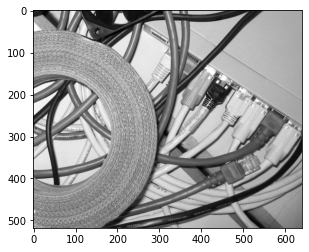

Image shape [v,u]: (518, 640)


In [8]:
import skimage

gray_img = skimage.io.imread("res/cable_salat.png")
plt.imshow(gray_img, cmap='gray')
plt.show()

# It is highly important to understand the shape of an image
# The first dimension refers to the v axis, while the second dimension refers to the u axis
print(f"Image shape [v,u]: {gray_img.shape}")

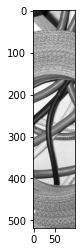

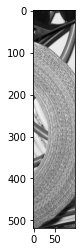

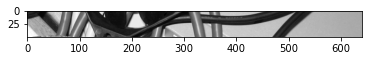

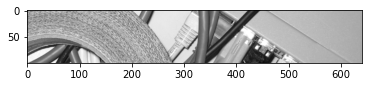

In [9]:
# @student: access all pixels where u < 100
plt.imshow(gray_img[:, :100], cmap="gray")
plt.show()

# @student: access all pixels where 150 < u < 250
plt.imshow(gray_img[:, 150:250], cmap="gray")
plt.show()

# @student: access all pixels where v < 50
plt.imshow(gray_img[:50, :], cmap="gray")
plt.show()

# @student: access all pixels where 100 <= v < 200
plt.imshow(gray_img[100:200, :], cmap="gray")
plt.show()

In [10]:
# @student: calculate min, max, and mean pixel values of the loaded image
# you are free to use all numpy functions

img_values = gray_img.flatten()
min = img_values.min()
max = img_values.max()
mean = img_values.mean()

print(f"min gray value: {min}")
print(f"max gray value: {max}")
print(f"mean gray value: {mean}")

min gray value: 7
max gray value: 255
mean gray value: 149.84897140444016


Implement a euclidean distance function that calculates the euclidean distance between two matrices.

$ecd = \sqrt{ \sum_i (u_i - v_i)^2 } $, where $u$ and $v$ are two arrays of the same shape.

In [11]:
def ecd(u: np.ndarray, v: np.ndarray) -> np.ndarray:
    assert u.shape == v.shape, f"shape of u {u.shape} does not equal shape of v {v.shape}"

    # @student implement an euclidean distance function between two images
    return ((u-v)**2).sum()**0.5

r1 = ecd(np.array([10, 10, 10]), np.array([10, 10, 10]))

assert r1 == 0, "Wrong implementation of ecd"

r2 = ecd(np.array([10, 10, 10]), np.array([0, 0, 5]))

assert r2 == 15, "Wrong implementation of ecd"

#### Part 3: Salt And Pepper Noise

In the lecture, different noise types are discussed. In this exercise, you have to implement simulated salt and pepper noise on an image.

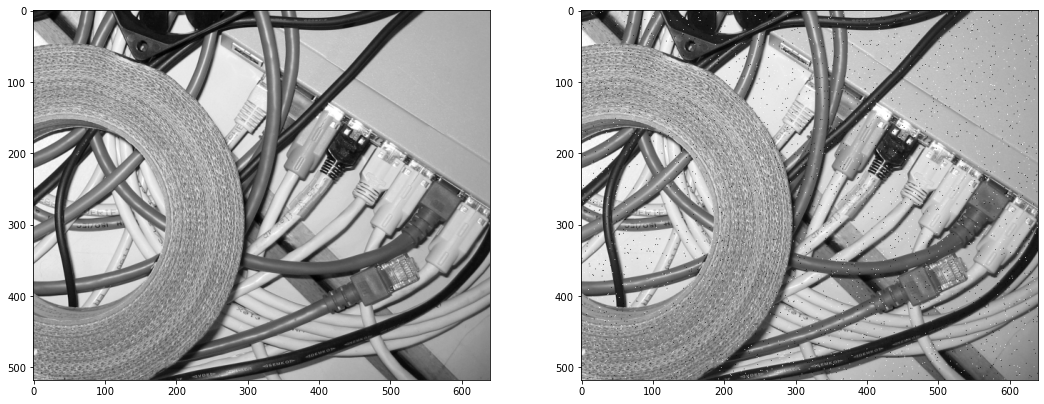

In [16]:
import copy

def add_salt_and_pepper_noise(img: np.ndarray, percentage: float) -> np.ndarray:
    noisy_img = copy.deepcopy(img)

    # @student: implement salt and pepper noise
    # hint: using numpy you can set an multiple indexes at the same time
    # noisy_img[[v0, v1, ..., vn], [u0, u1, ... un]] = 0
    #
    # np.random.randint(...) generates a random integer
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    # num_salt = np.ceil(percentage * img.size) / 2
    # coords_u = np.random.randint(0, img.shape[0] - 1, int(num_salt))
    # coords_v = np.random.randint(0, img.shape[1] - 1, int(num_salt))
    # noisy_img[coords_u, coords_v] = 255
    #
    # num_salt = np.ceil(percentage * img.size) / 2
    # coords_u = np.random.randint(0, img.shape[0] - 1, int(num_salt))
    # coords_v = np.random.randint(0, img.shape[1] - 1, int(num_salt))
    # noisy_img[coords_u, coords_v] = 0
    noise = np.random.choice([0,250,-250], p=[0.99, 0.005, 0.005], size=noisy_img.shape[:2])
    noisy_img = noisy_img + noise

    return np.clip(noisy_img, 0, 255)


salt_pepper_img = add_salt_and_pepper_noise(gray_img, 0.005)

_, (ax1, ax2) = plt.subplots(1, 2)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(salt_pepper_img, cmap="gray")
plt.show()

#### Part 4: Gaussian Kernel And The Wiener Filter

In order to smooth an image, a gaussian kernel can be used. Implement the gaussian kernel which is given by $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{x^2}{\sigma^2}}$.

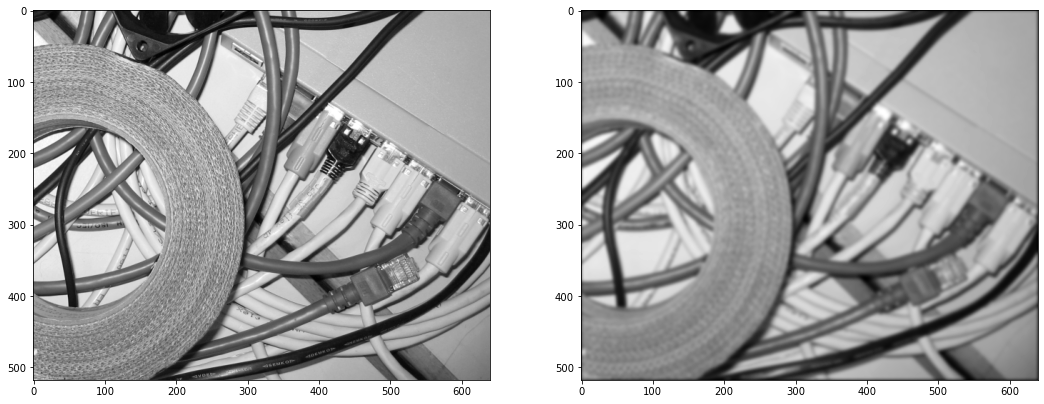

In [21]:
# scipy is a python library for scientific computing
# We will use the scipy.signal.convolve2d function
# Which gets an image (np.ndarray) and a kernel()

import scipy.signal

def create_gaussian_kernel(size: int, sigma_squared: float):
    assert size % 2 == 1, "Kernel size must be uneven"

    # @student: implement the gaussian kernel creation
    shape = (size, size)
    center = (shape[0] // 2)
    kernel = np.ones(shape=shape)
    for u in range(kernel.shape[0]):
        for v in range(kernel.shape[1]):
            kernel[u, v] = (1 / (2*np.pi*sigma_squared) * np.exp(-0.5 * ((np.square(u-center) + np.square(v-center))/sigma_squared)))

    return kernel

gaussian_kernel = create_gaussian_kernel(11, 5.0)
noise_img = scipy.signal.convolve2d(gray_img, gaussian_kernel, mode="same", boundary='fill', fillvalue=0)

_, (ax1, ax2) = plt.subplots(1, 2)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(noise_img, cmap="gray")
plt.show()

After the application of the gaussian filter the image is artificially blured.
Use a wiener filter to remove the blur.

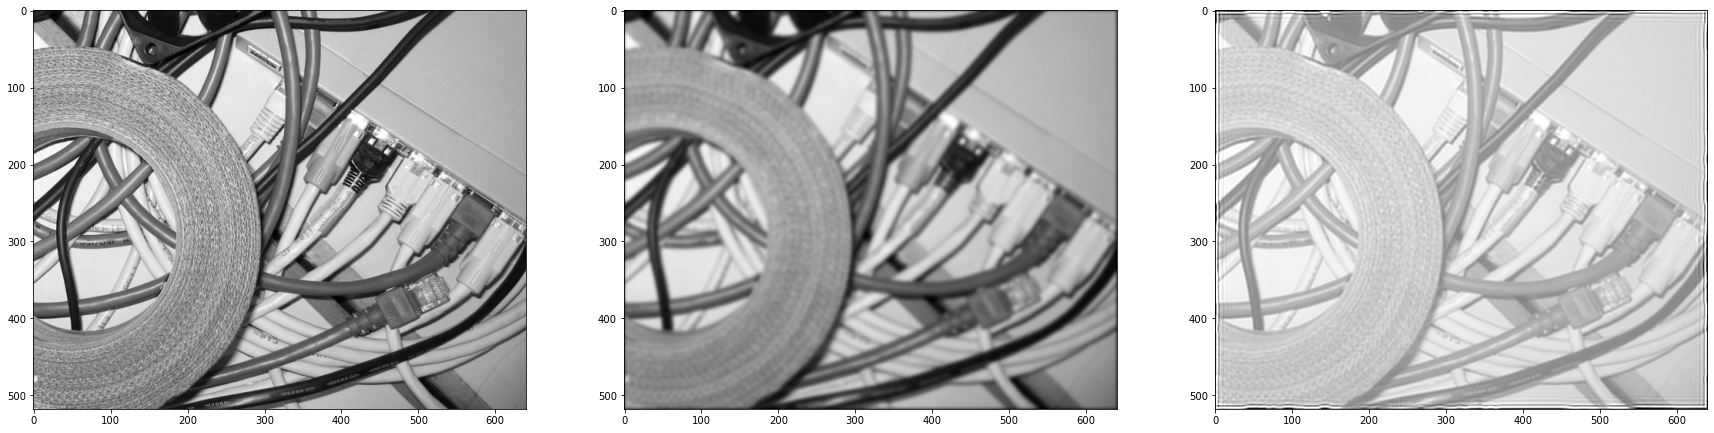

In [22]:
from skimage import restoration

# @student: call the restoration.wiener(...) function in order to remove the blur
# https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.wiener
wiener_img = restoration.wiener(noise_img / 255, gaussian_kernel, 0.0001)

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(5 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(noise_img, cmap="gray")
ax3.imshow(wiener_img, cmap="gray")
plt.show()